In [1]:
!conda install -c anaconda graphviz python-graphviz #install graphviz

Solving environment: ...working... done

# All requested packages already installed.



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

---
# Problem 1 : Predicting CentralAir using SalePrice
Import the complete dataset “train.csv” in Jupyter, as `houseData = pd.read_csv('train.csv')`

Note : In this exercise, we will not extract the variables from the dataset, as we did the last time.

In [3]:
houseData = pd.read_csv('train.csv')
houseData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### a) Plot the binary distribution of houseData['CentralAir'] using catplot to check the ratio of Y against N. 
Note that the classes Y and N are quite unbalanced; do you think this will create any problem in our Classification?

#### Ans: 
Yes. Ratio is skewed and accuracy of the classifier will be inflated. Should observe classifier's precision and recall rate instead

In [4]:
houseData.CentralAir.value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

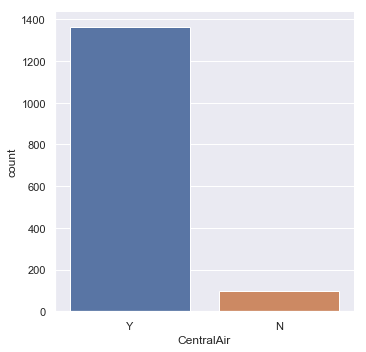

In [5]:
sns.catplot('CentralAir', data = houseData, kind = 'count')

### b) Plot houseData['CentralAir'] vs houseData['SalePrice'] using boxplot, and note the strong relationship.
Also check the mutual relationship by plotting the two variables using a swarmplot, and note the difference.

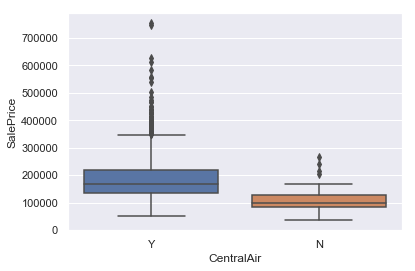

In [6]:
sns.boxplot('CentralAir', 'SalePrice', data = houseData)

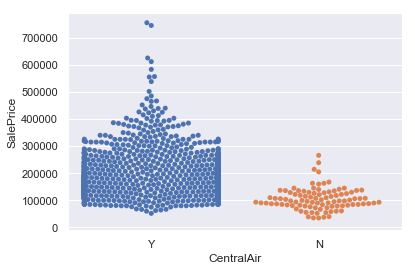

In [7]:
sns.swarmplot('CentralAir', 'SalePrice', data = houseData)

### c) Import Classification Tree model from Scikit-Learn : `from sklearn.tree import DecisionTreeClassifier`

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

### d) Partition the complete dataset houseData into houseData_train (1100 rows) and houseData_test (360 rows).

In [9]:
X = houseData[['SalePrice']]
y = pd.get_dummies(houseData[['CentralAir']])[['CentralAir_Y']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(360/1460), random_state=42)
print(X_train.size, y_train.size)
print(X_test.size, y_test.size)

1100 1100
360 360


### e) Training : Fit a Decision Tree model for classification of CentralAir using SalePrice using the following variables.

`y_train = pd.DataFrame(houseData_train['CentralAir'])`

`X_train = pd.DataFrame(houseData_train['SalePrice'])`

In [10]:
# X_train and y_train has already been defined
clf = DecisionTreeClassifier(max_depth = 4)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

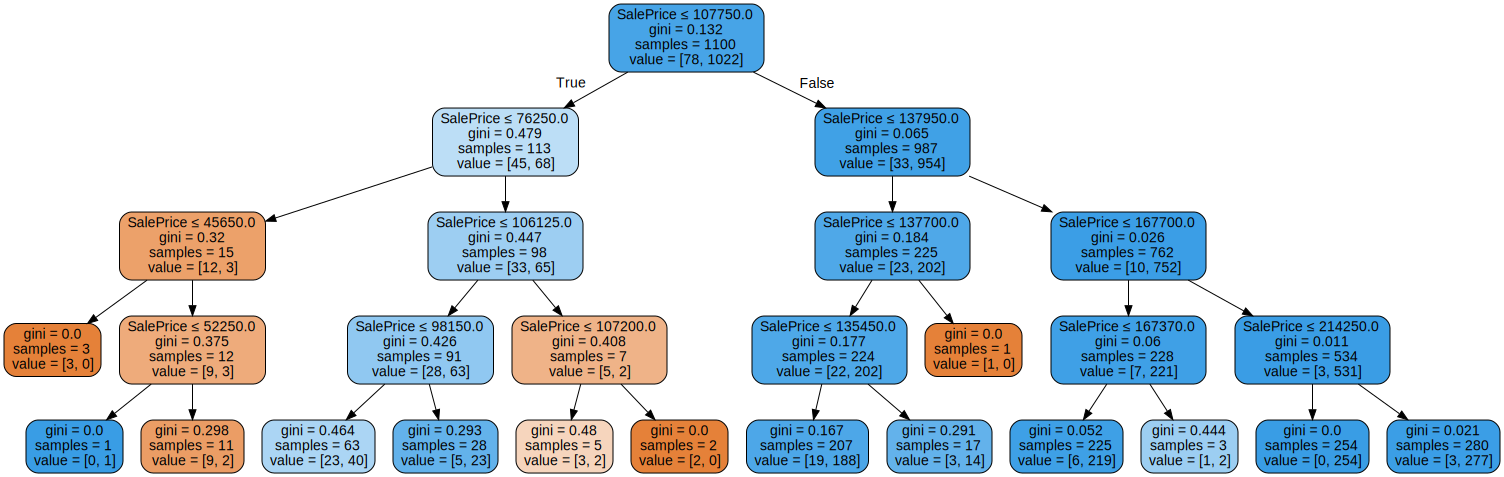

In [11]:
# Import export_graphviz from sklearn.tree
from sklearn.tree import export_graphviz

# Export the Decision Tree as a dot object
treedot = export_graphviz(clf,                                          # the model
                          feature_names = X.columns,                    # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

# Render using graphviz
import graphviz
graphviz.Source(treedot)

### g) Predict CentralAir for the train dataset using the Decision Tree model, and plot the Two-Way Confusion Matrix.
Predict CentralAir for the test dataset using the Decision Tree model, and plot the Two-Way Confusion Matrix.

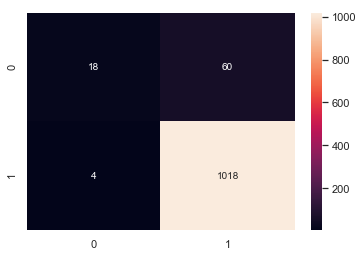

In [12]:
from sklearn.metrics import confusion_matrix
y_train_pred = clf.predict(X_train)
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, fmt=".0f")

### h) Print all the accuracy parameters of the decision tree model, including its Classification Accuracy, True Positive Rate, True Negative Rate, False Positive Rate and False Negative Rate, based on the aforesaid confusion matrix.
![title](https://i.stack.imgur.com/2Pu57.jpg)

In [13]:
TN, FP, FN, TP = confusion_matrix(y_train, y_train_pred).ravel() # flattens the array

ACC = (TP+TN)/(TP+FP+FN+TN) # Overall accuracy
TPR = TP/(TP+FN) # Sensitivity, hit rate, recall, or true positive rate
TNR = TN/(TN+FP) # Specificity or true negative rate
FPR = FP/(FP+TN) # Fall out or false positive rate
FNR = FN/(TP+FN) # False negative rate

# PPV = TP/(TP+FP) # Precision or positive predictive value
# NPV = TN/(TN+FN) # Negative predictive value
# FDR = FP/(TP+FP) # False discovery rate

print(f'''
Accuracy:\t\t{ACC}
True Positive Rate:\t{TPR}
True Negative Rate:\t{TNR}
False Positive Rate:\t{FPR}
False Negative Rate:\t{FNR}
''')


Accuracy:		0.9418181818181818
True Positive Rate:	0.9960861056751468
True Negative Rate:	0.23076923076923078
False Positive Rate:	0.7692307692307693
False Negative Rate:	0.003913894324853229



# Problem 2 : Predicting CentralAir using Other Variables
Perform all the above steps on 'CentralAir' against each of the variables 'GrLivArea', 'LotArea', 'TotalBsmtSF'
one-by-one to obtain individual Decision Trees. 

Discuss with your Friends about the models, compare the Classification
Accuracy, check the True Positives and False Positives, and determine which model is the best to predict 'CentralAir'.

In [14]:
def decision_tree_clf(X_col, y_col, df):
    
    X = df[[X_col]]
    y = df[[y_col]]
    X_name = X.columns[0]
    y_name = y.columns[0]
    
    
    fig, (ax1,ax2) = plt.subplots(1,2, figsize = (20,8))
    
    sns.boxplot(X_name, y_name, data = df, ax = ax1)
    ax1.set_title(f'Boxplot for {X_name} against {y_name}')
    
    sns.swarmplot(X_name, y_name, data = df, ax = ax2)
    ax2.set_title(f'Swarmplot for {X_name} against {y_name}')
    
    plt.tight_layout()
    
    
    # convert Y and N to 1 and 0
    y = pd.get_dummies(df[[y_name]])[[f'{y_name}_Y']]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(360/1460), random_state=42)
    clf = DecisionTreeClassifier(max_depth = 4)
    clf.fit(X_train, y_train)
    
    treedot = export_graphviz(clf,                                          # the model
                          feature_names = X.columns,                    # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

    display(graphviz.Source(treedot))
    
    y_train_pred = clf.predict(X_train)
    
    fig, axe = plt.subplots(1,1,figsize=(5,5))
    sns.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, fmt=".0f", ax = axe)
    axe.set_title(f'Confusion matrix for {X_name} against {y_name}')
    
    
    TN, FP, FN, TP = confusion_matrix(y_train, y_train_pred).ravel() # flattens the array
    ACC = (TP+TN)/(TP+FP+FN+TN) # Overall accuracy
    TPR = TP/(TP+FN) # Sensitivity, hit rate, recall, or true positive rate
    TNR = TN/(TN+FP) # Specificity or true negative rate
    FPR = FP/(FP+TN) # Fall out or false positive rate
    FNR = FN/(TP+FN) # False negative rate
    PPV = TP/(TP+FP) # Precision or positive predictive value

    print(f'''
    ACC: {ACC}
    TPR: {TPR}
    TNR: {TNR}
    FPR: {FPR}
    FNR: {FNR}
    
    Recall:\t{TPR}
    Precision:\t{PPV}
    ''')

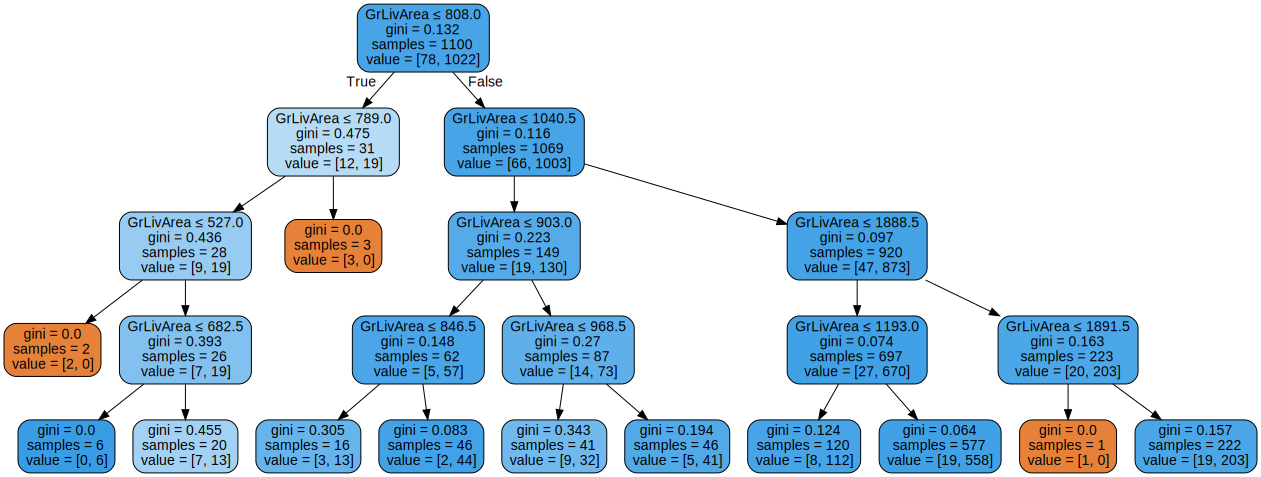


    ACC: 0.9345454545454546
    TPR: 1.0
    TNR: 0.07692307692307693
    FPR: 0.9230769230769231
    FNR: 0.0
    
    Recall:	1.0
    Precision:	0.9341864716636198
    


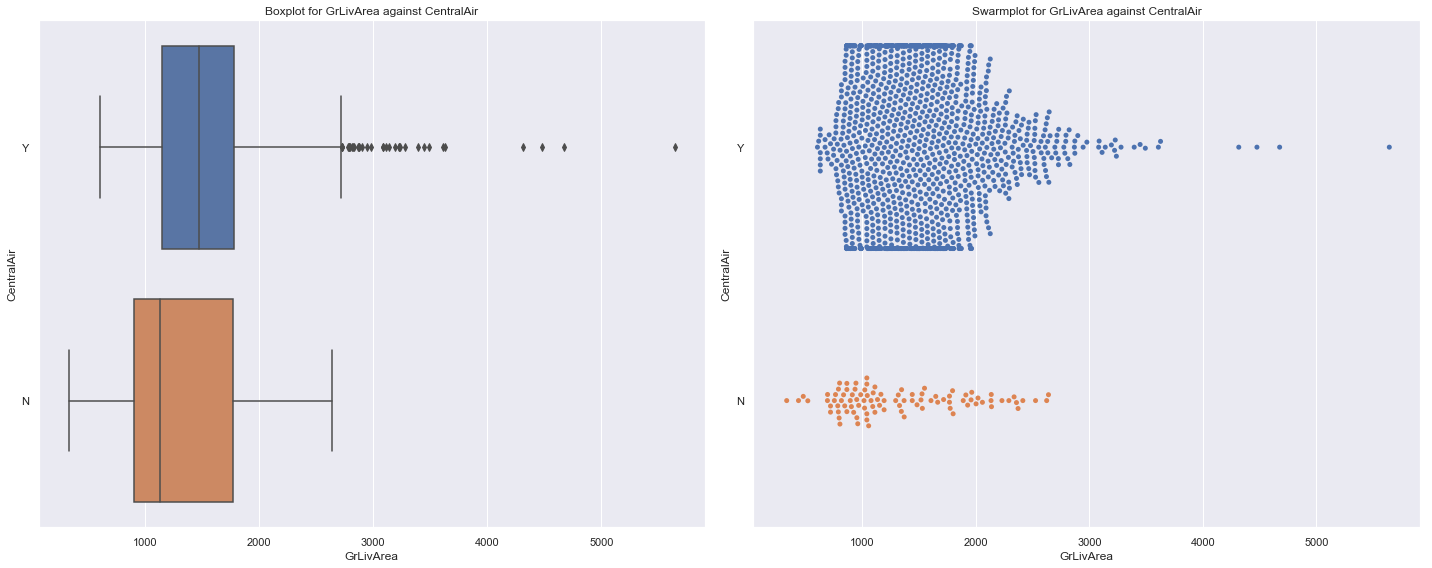

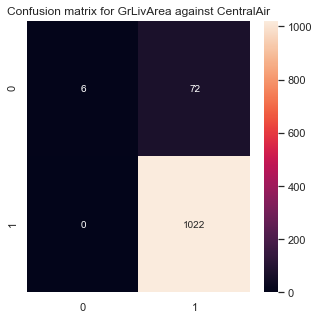

In [15]:
decision_tree_clf('GrLivArea', 'CentralAir', houseData)

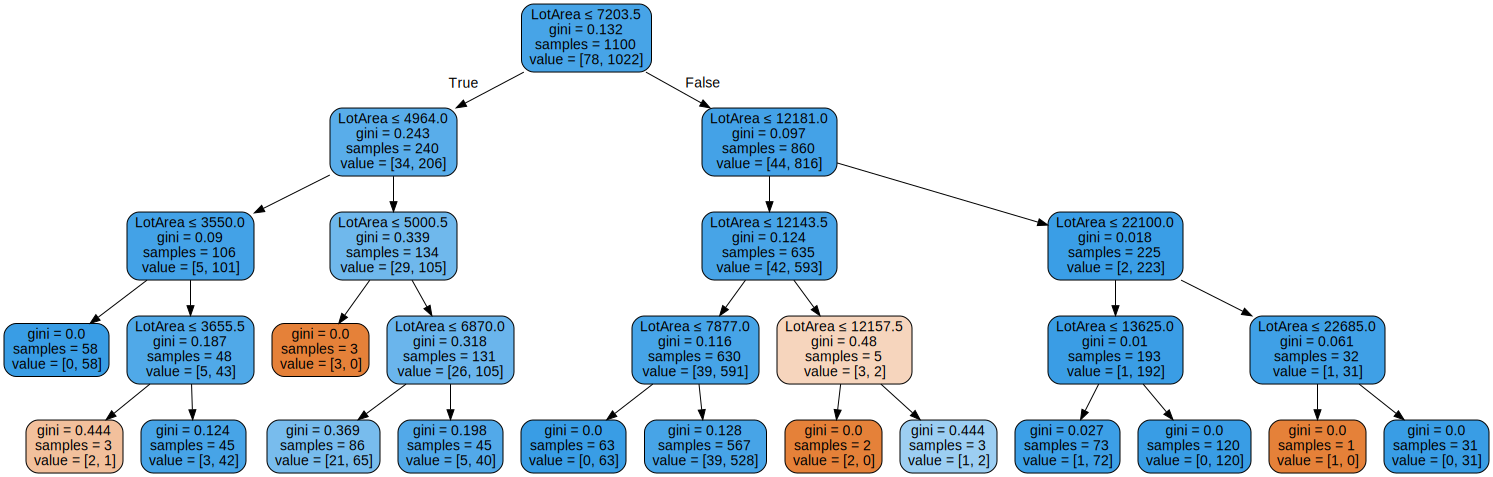


    ACC: 0.9354545454545454
    TPR: 0.9990215264187867
    TNR: 0.10256410256410256
    FPR: 0.8974358974358975
    FNR: 0.0009784735812133072
    
    Recall:	0.9990215264187867
    Precision:	0.9358386801099908
    


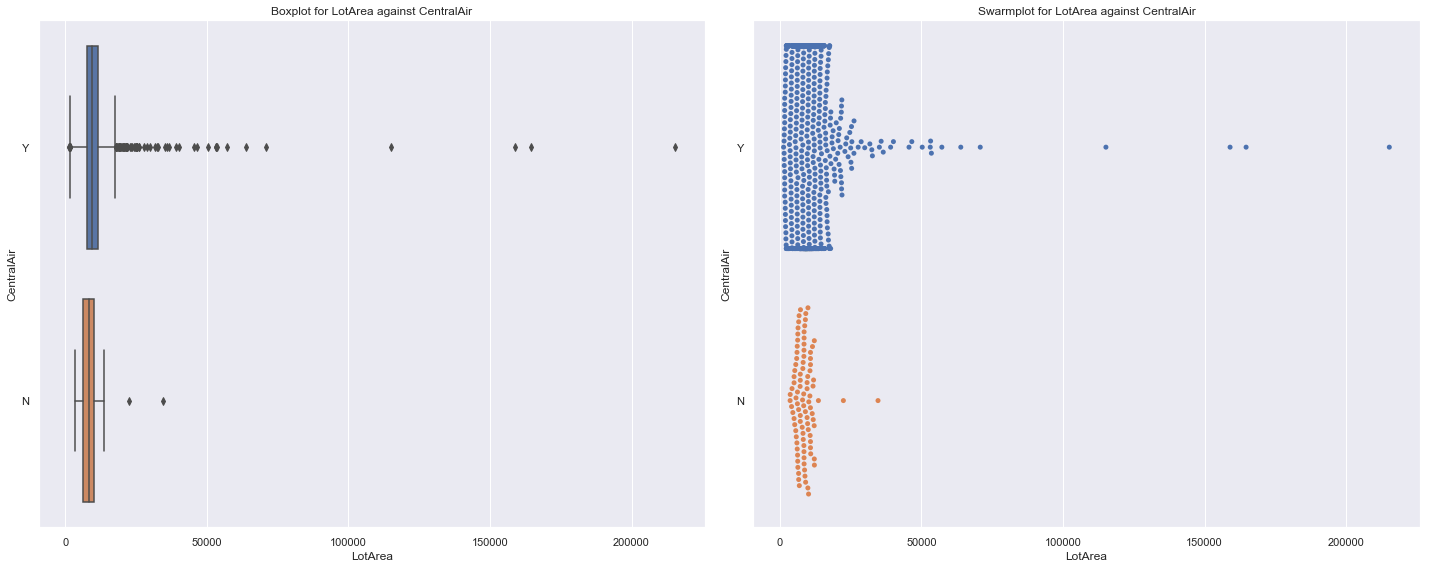

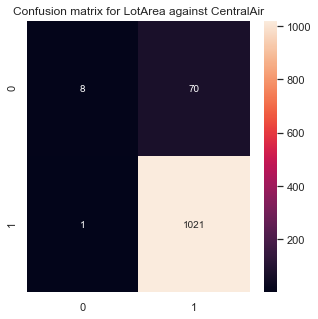

In [16]:
decision_tree_clf('LotArea', 'CentralAir', houseData)

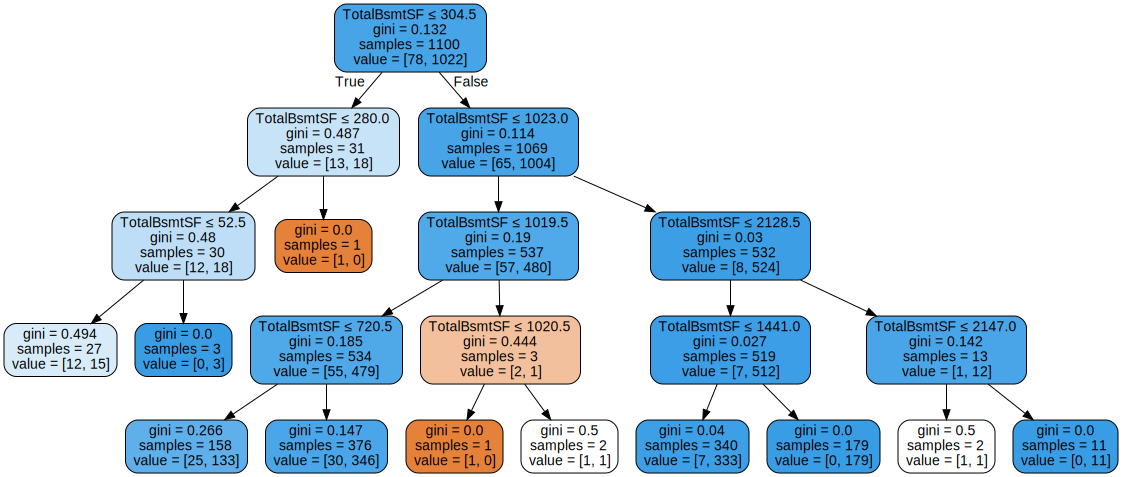


    ACC: 0.9309090909090909
    TPR: 0.9980430528375733
    TNR: 0.05128205128205128
    FPR: 0.9487179487179487
    FNR: 0.0019569471624266144
    
    Recall:	0.9980430528375733
    Precision:	0.9323583180987203
    


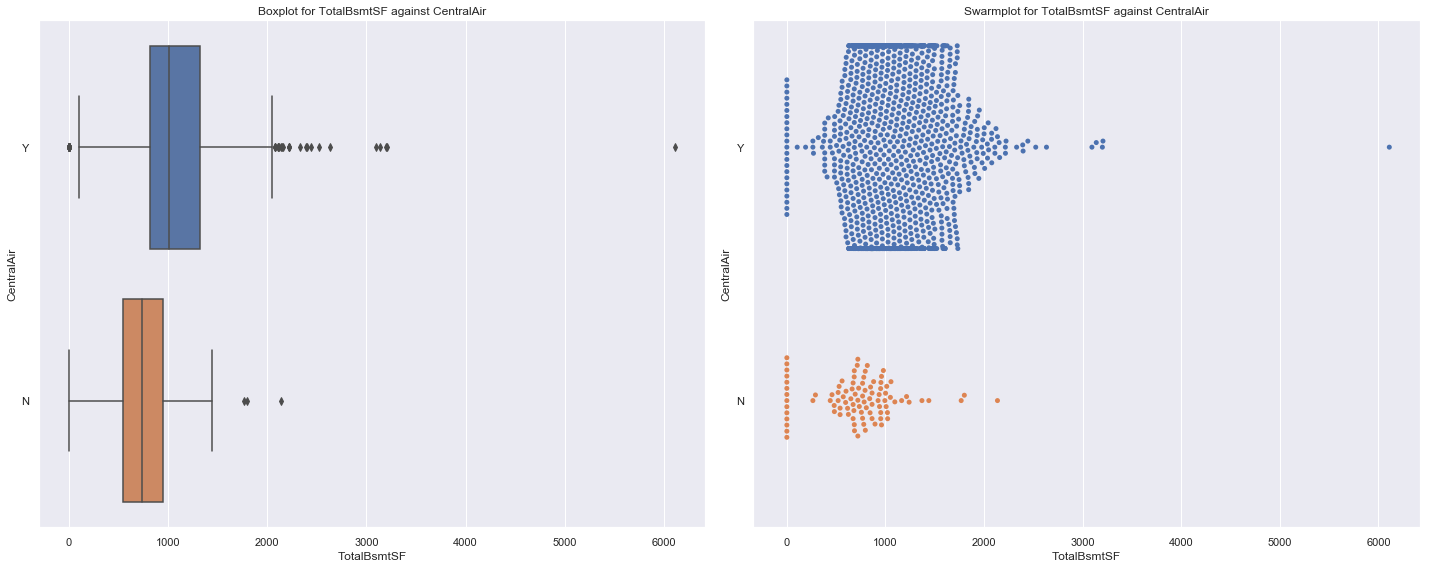

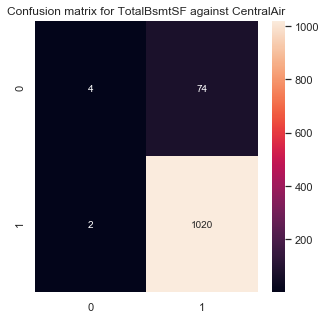

In [17]:
decision_tree_clf('TotalBsmtSF', 'CentralAir', houseData)

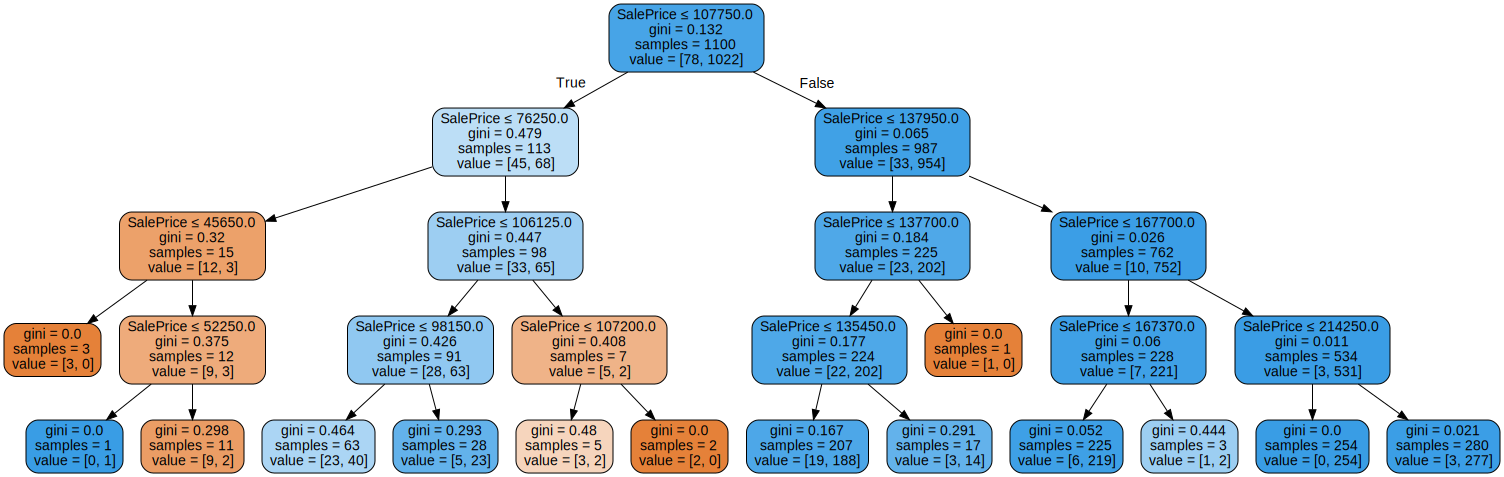


    ACC: 0.9418181818181818
    TPR: 0.9960861056751468
    TNR: 0.23076923076923078
    FPR: 0.7692307692307693
    FNR: 0.003913894324853229
    
    Recall:	0.9960861056751468
    Precision:	0.9443413729128015
    


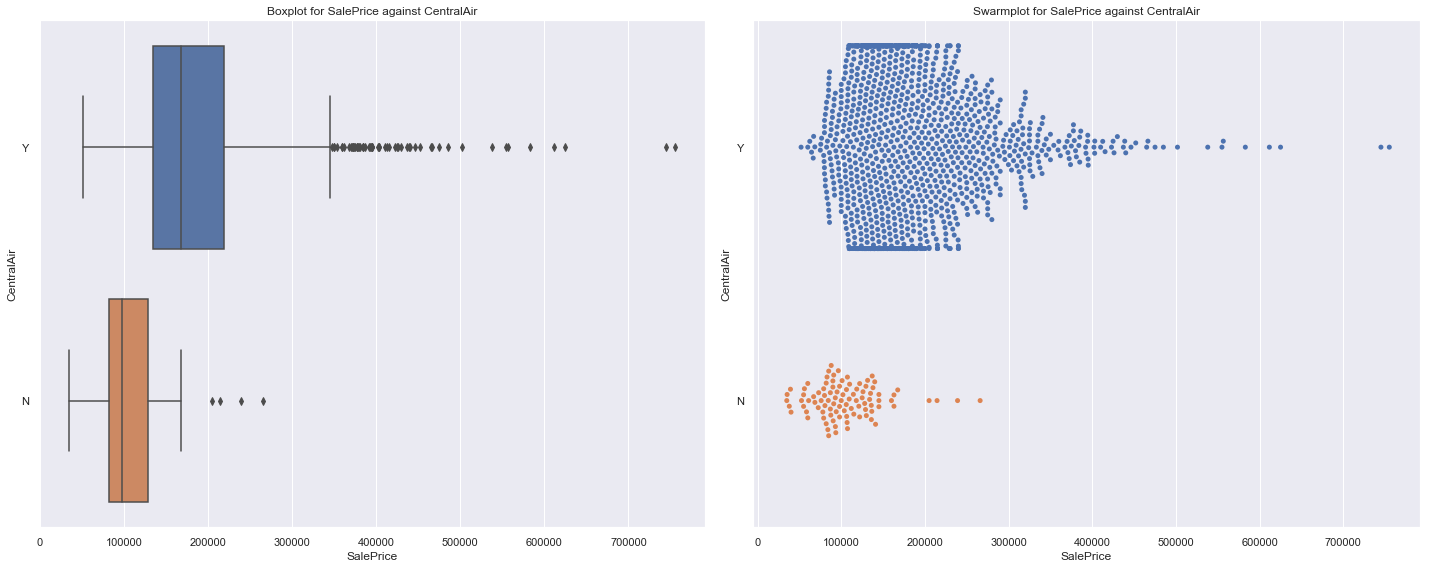

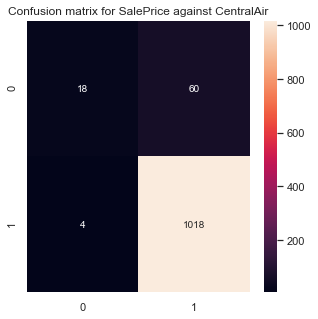

In [18]:
decision_tree_clf('SalePrice', 'CentralAir', houseData)

# Bonus Problems
1. Note that DecisionTreeClassifier model can take more than one Predictor to model the Response variable.
Try using this feature to fit a Decision Tree model to predict 'CentralAir' using all the four variables
'SalePrice', 'GrLivArea', 'LotArea', 'TotalBsmtSF'. Find the accuracy of this multi-variate model.
2. Fit a Decision Tree model to predict 'CentralAir' using all the numeric variables in the given dataset. You
may use all the numeric variables from Exercise 2. Find the accuracy parameters of this multi-variate model.

Are the False Positive Rates of the various Decision Tree models significantly higher/lower than the False Negative Rates?
Does this have anything to do with the unbalanced classes Y and N of 'CentralAir'? Experiment, and think about it.

### Bonus Problem 1

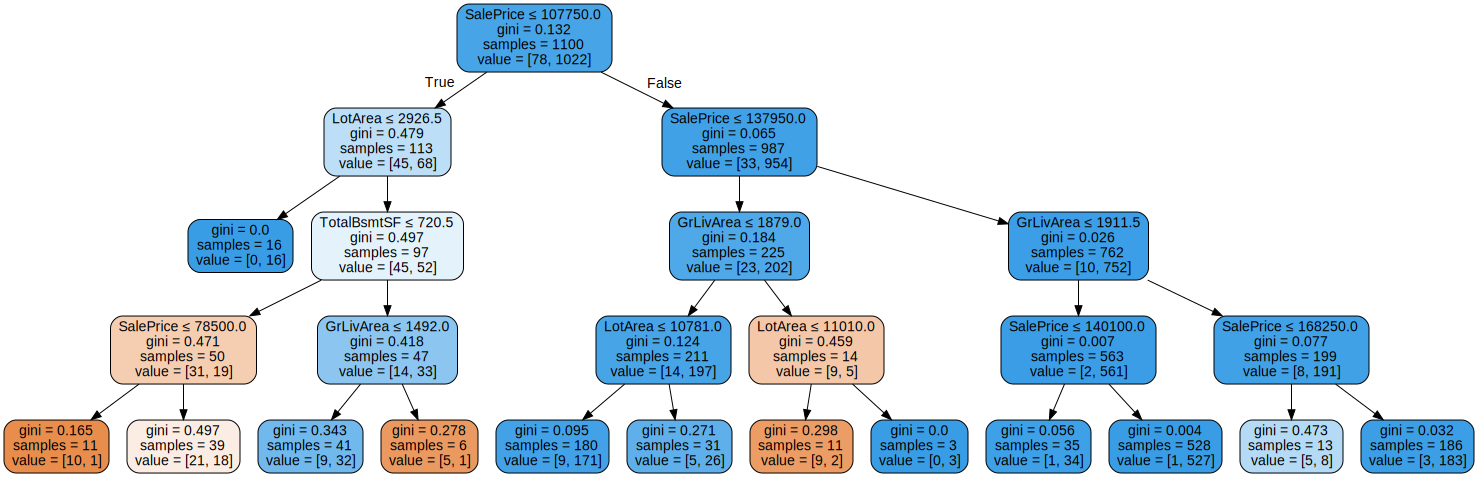


Accuracy:	0.95
Recall:	0.9784735812133072
Precision:	0.968054211035818



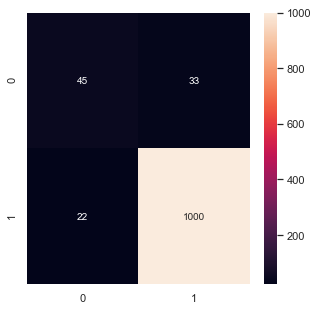

In [19]:
col = ['SalePrice', 'GrLivArea', 'LotArea', 'TotalBsmtSF']
X = houseData[col]
y = houseData[['CentralAir']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(360/1460), random_state=42)

clf = DecisionTreeClassifier(max_depth = 4)
clf.fit(X_train, y_train)

treedot = export_graphviz(clf,                                          # the model
                      feature_names = X.columns,                    # the features 
                      out_file = None,                              # output file
                      filled = True,                                # node colors
                      rounded = True,                               # make pretty
                      special_characters = True)                    # postscript

display(graphviz.Source(treedot))

y_train_pred = clf.predict(X_train)

fig, axe = plt.subplots(1,1,figsize=(5,5))
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, fmt=".0f", ax = axe)


TN, FP, FN, TP = confusion_matrix(y_train, y_train_pred).ravel() # flattens the array
ACC = (TP+TN)/(TP+FP+FN+TN) # Overall accuracy
TPR = TP/(TP+FN) # Sensitivity, hit rate, recall, or true positive rate
PPV = TP/(TP+FP) # Precision or positive predictive value

print(f'''
Accuracy:\t{ACC}
Recall:\t{TPR}
Precision:\t{PPV}
''')

### Bonus Problem 2

In [20]:
numeric_df = houseData.select_dtypes(['int64', 'float64'])
sum_na = numeric_df.isna().sum()[numeric_df.isna().sum() != 0]
mean_na = numeric_df.isna().mean()[numeric_df.isna().mean() != 0]
pd.concat([sum_na, mean_na], axis = 1, keys = ['Total','Percent'])

,Total,Percent
LotFrontage,259,0.177397
MasVnrArea,8,0.005479
GarageYrBlt,81,0.055479


There is a relatively low percentage of `NaN` values. 

For this case, we will drop 'LotFrontage' and then drop the rest of the `NaN` values.

In [21]:
house_df = pd.concat([numeric_df,houseData[['CentralAir']]], axis = 1)

house_df.drop('LotFrontage', axis = 1, inplace = True)
house_df.dropna(axis = 0, inplace = True)
house_df.isna().sum()

Id               0
MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
CentralAir       0
dtype: int64

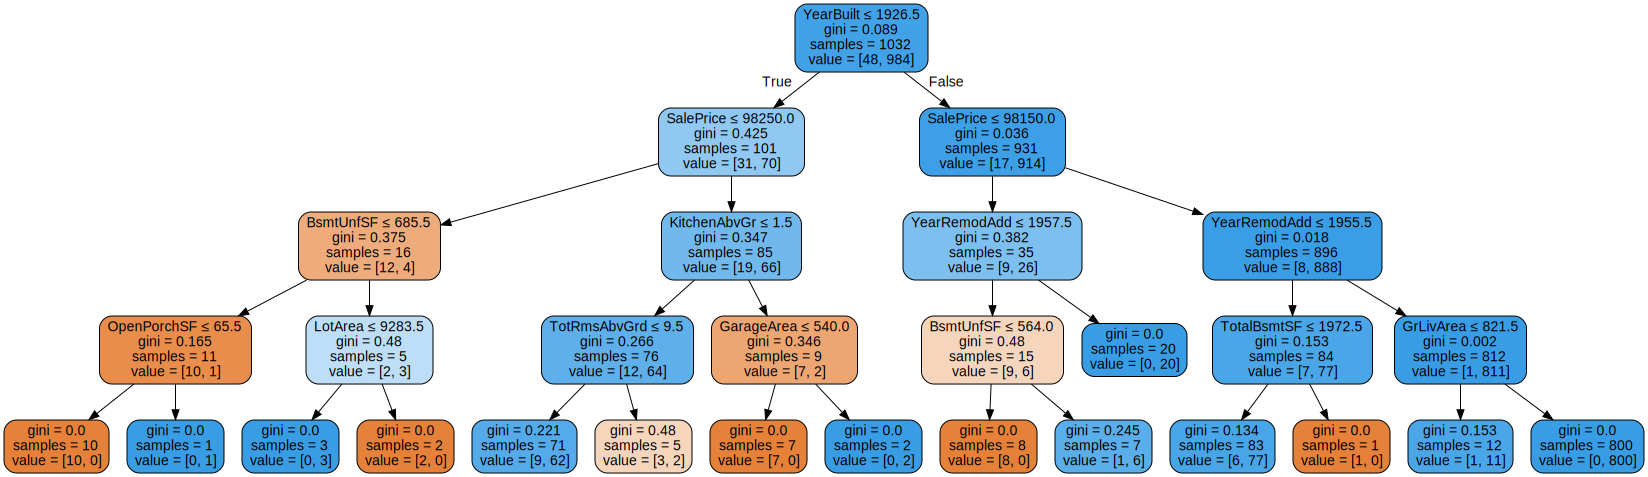


Accuracy:	0.9815891472868217
Recall:	0.9979674796747967
Precision:	0.982982982982983



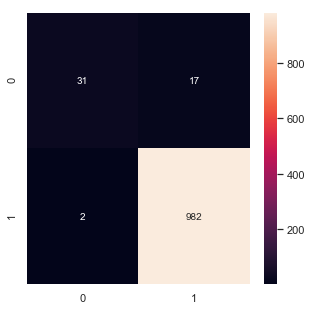

In [22]:
X = house_df.loc[:, house_df.columns != 'CentralAir']
y = house_df[['CentralAir']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(360/1460), random_state=42)

clf = DecisionTreeClassifier(max_depth = 4)
clf.fit(X_train, y_train)

treedot = export_graphviz(clf,                                      # the model
                      feature_names = X.columns,                    # the features 
                      out_file = None,                              # output file
                      filled = True,                                # node colors
                      rounded = True,                               # make pretty
                      special_characters = True)                    # postscript

display(graphviz.Source(treedot))

y_train_pred = clf.predict(X_train)

fig, axe = plt.subplots(1,1,figsize=(5,5))
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, fmt=".0f", ax = axe)


TN, FP, FN, TP = confusion_matrix(y_train, y_train_pred).ravel() # flattens the array
ACC = (TP+TN)/(TP+FP+FN+TN) # Overall accuracy
TPR = TP/(TP+FN) # Sensitivity, hit rate, recall, or true positive rate
PPV = TP/(TP+FP) # Precision or positive predictive value

print(f'''
Accuracy:\t{ACC}
Recall:\t{TPR}
Precision:\t{PPV}
''')